In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
df_cali=fetch_california_housing()

In [3]:
df_cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df=pd.DataFrame(df_cali.data,columns=df_cali.feature_names)

In [5]:
df['target']=df_cali.target

In [6]:
df.shape

(20640, 9)

In [7]:
df=df.sample(frac=0.25)

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [10]:
x_train,x_test,y_train,y_test

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 16927  2.7474      43.0  4.418953   1.052369      1573.0  3.922693     37.58   
 8924   2.3098      52.0  2.703704   1.093682       679.0  1.479303     34.00   
 8565   5.0594      41.0  5.851986   1.007220       756.0  2.729242     33.92   
 9617   1.7222      18.0  4.790875   1.019011       576.0  2.190114     37.29   
 16105  3.4919      44.0  5.138418   1.031073      1137.0  3.211864     37.75   
 ...       ...       ...       ...        ...         ...       ...       ...   
 17072  2.7399      18.0  3.480611   1.110458      1639.0  1.925969     37.52   
 3410   4.4375      24.0  5.335423   1.055381      2310.0  2.413793     34.26   
 2088   1.5273      46.0  4.764065   1.076225      1368.0  2.482759     36.75   
 5644   2.5795      27.0  4.274611   1.147668      1359.0  3.520725     33.75   
 12435  2.2679      12.0  4.730769   1.065385      1334.0  5.130769     33.68   
 
        Longitude  
 16927

In [11]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()

In [12]:
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [13]:
y_pred=reg.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [15]:
score

0.5952533106735435

In [16]:
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'max_features': ['msc','sqrt', 'log2']}

In [17]:
reg=DecisionTreeRegressor()

In [18]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regcv=GridSearchCV(reg,param_grid=parameters,cv=2,scoring='neg_mean_squared_error')

In [19]:
regcv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['msc', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
regcv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
reg1=DecisionTreeRegressor(criterion='poisson',max_depth=6,max_features='log2',splitter='best')

In [22]:
reg1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='log2')

[Text(0.5065524193548387, 0.9285714285714286, 'x[7] <= -121.855\npoisson = 0.308\nsamples = 3457\nvalue = 2.089'),
 Text(0.25806451612903225, 0.7857142857142857, 'x[0] <= 3.368\npoisson = 0.298\nsamples = 824\nvalue = 2.511'),
 Text(0.12903225806451613, 0.6428571428571429, 'x[0] <= 2.527\npoisson = 0.218\nsamples = 300\nvalue = 1.619'),
 Text(0.06451612903225806, 0.5, 'x[7] <= -122.485\npoisson = 0.182\nsamples = 135\nvalue = 1.255'),
 Text(0.03225806451612903, 0.35714285714285715, 'x[6] <= 38.725\npoisson = 0.077\nsamples = 42\nvalue = 0.889'),
 Text(0.016129032258064516, 0.21428571428571427, 'x[6] <= 38.395\npoisson = 0.181\nsamples = 4\nvalue = 1.709'),
 Text(0.008064516129032258, 0.07142857142857142, 'poisson = 0.0\nsamples = 1\nvalue = 0.675'),
 Text(0.024193548387096774, 0.07142857142857142, 'poisson = 0.073\nsamples = 3\nvalue = 2.053'),
 Text(0.04838709677419355, 0.21428571428571427, 'x[2] <= 12.519\npoisson = 0.03\nsamples = 38\nvalue = 0.802'),
 Text(0.04032258064516129, 0.07

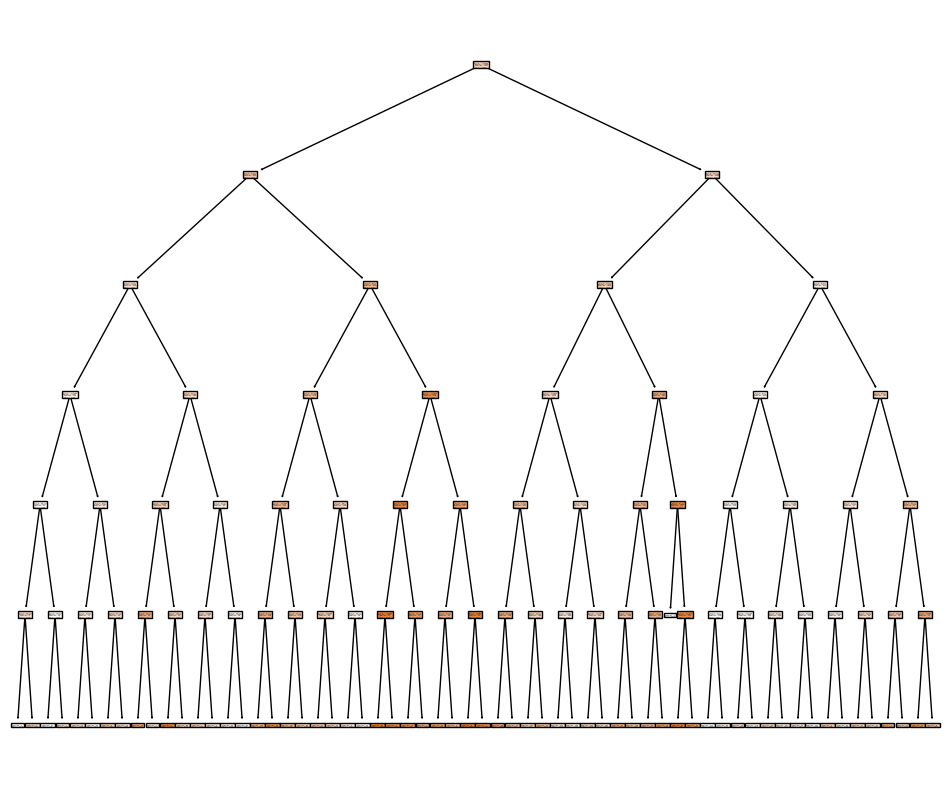

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(reg1,filled=True)

In [24]:
y_pred1=reg1.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred1)

In [26]:
score

0.67449406135122